In [37]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels jupyter


In [38]:
import pandas as pd

df = pd.read_csvdf = pd.read_csv("/content/drive/My Drive/rain-prediction-project/data/Rainfall Dataset.csv")

print(df)

            Province  30 Year Average (mm)  Monsoon 2022 (mm)
0           Pakistan                 136.5              390.7
1               AJ&K                 136.5              392.2
2        Balochistan                  60.7              309.2
3    GilgitBaltistan                  40.0               87.8
4  KhyberPakhtunkhwa                 242.4              352.4
5             Punjab                 224.0              424.0
6              Sindh                 123.0              697.1


In [39]:
print(df.isnull().sum())

Province                0
30 Year Average (mm)    0
Monsoon 2022 (mm)       0
dtype: int64


In [40]:
sindh_df = df[df['Province'] == 'Sindh']
sindh_df

,Province,30 Year Average (mm),Monsoon 2022 (mm)
6,Sindh,123.0,697.1


In [41]:
print(df['Province'].unique())

['Pakistan' 'AJ&K' 'Balochistan' 'GilgitBaltistan' 'KhyberPakhtunkhwa'
 'Punjab' 'Sindh']


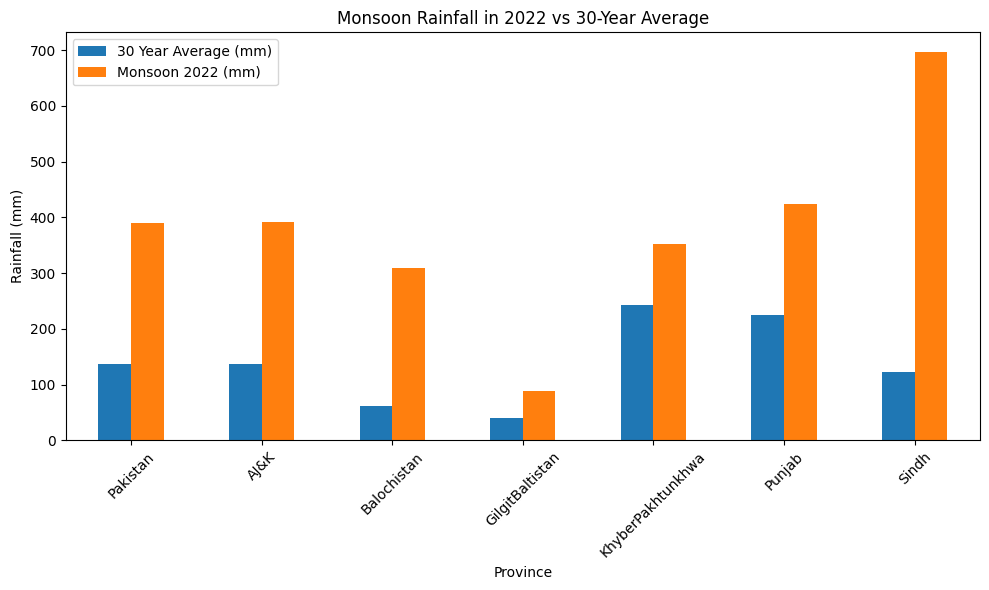

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/drive/My Drive/rain-prediction-project/data/Rainfall Dataset.csv")  # Use your actual file name

# Calculate increase
df['Increase (mm)'] = df['Monsoon 2022 (mm)'] - df['30 Year Average (mm)']

# Plot
df.plot(x='Province', y=['30 Year Average (mm)', 'Monsoon 2022 (mm)'], kind='bar', figsize=(10,6))
plt.title('Monsoon Rainfall in 2022 vs 30-Year Average')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd

df = pd.read_csvdf = pd.read_csv("/content/drive/MyDrive/rain-prediction-project/data/sindh_monthly_rainfall_2000_2023.csv")

print(df)

     Year      Month Province  Rainfall (mm)
0    2000    January    Sindh          159.9
1    2000   February    Sindh            6.3
2    2000      March    Sindh           68.8
3    2000      April    Sindh           55.8
4    2000        May    Sindh          184.1
..    ...        ...      ...            ...
283  2023     August    Sindh           66.0
284  2023  September    Sindh          122.1
285  2023    October    Sindh          226.3
286  2023   November    Sindh          211.5
287  2023   December    Sindh           23.1

[288 rows x 4 columns]


In [44]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           288 non-null    int64  
 1   Month          288 non-null    object 
 2   Province       288 non-null    object 
 3   Rainfall (mm)  288 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.1+ KB
None


In [45]:
print(df['Month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [46]:
print(df.describe())

              Year  Rainfall (mm)
count   288.000000     288.000000
mean   2011.500000     124.035069
std       6.934236      74.154287
min    2000.000000       0.100000
25%    2005.750000      57.450000
50%    2011.500000     123.600000
75%    2017.250000     187.250000
max    2023.000000     249.800000


In [47]:
monsoon_df = df[df['Month'].isin(['June', 'July', 'August','September'])]
monsoon_df

,Year,Month,Province,Rainfall (mm)
5,2000,June,Sindh,169.2
6,2000,July,Sindh,223.0
7,2000,August,Sindh,21.7
8,2000,September,Sindh,105.5
17,2001,June,Sindh,147.3
...,...,...,...,...
272,2022,September,Sindh,165.8
281,2023,June,Sindh,50.9
282,2023,July,Sindh,158.6
283,2023,August,Sindh,66.0


In [48]:
grouped = monsoon_df.groupby(['Year', 'Month'])['Rainfall (mm)'].sum().reset_index()
print(grouped.head())

   Year      Month  Rainfall (mm)
0  2000     August           21.7
1  2000       July          223.0
2  2000       June          169.2
3  2000  September          105.5
4  2001     August            1.6


In [36]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=grouped, x='Year', y='Rainfall (mm)', hue='Month', marker='o')
# plt.title('Monthly Rainfall in Sindh (June–August)')
# plt.ylabel('Rainfall (mm)')
# plt.grid(True)
# plt.show()

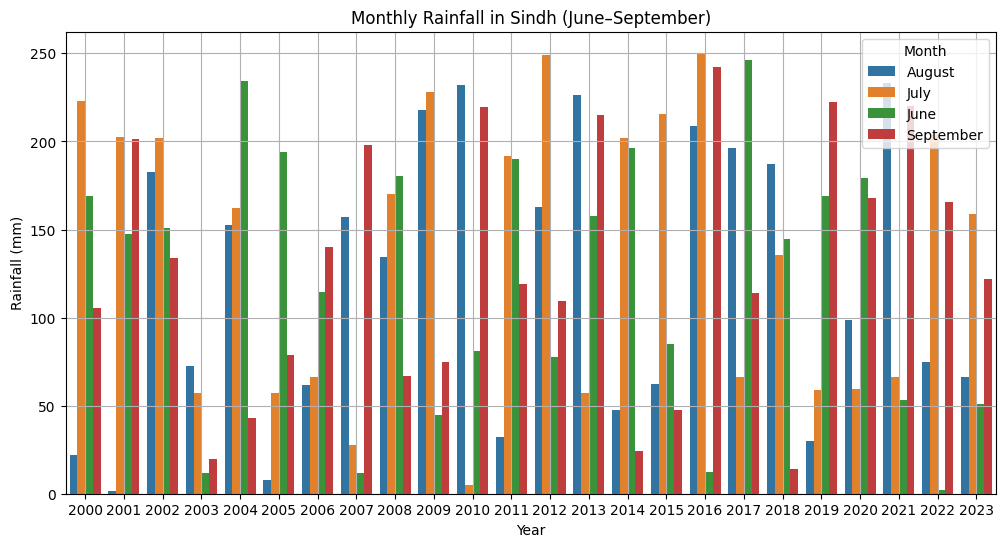

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Year', y='Rainfall (mm)', hue='Month')
plt.title('Monthly Rainfall in Sindh (June–September)')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Month')
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

def predict_month(month):
    month_df = grouped[grouped['Month'] == month]
    X = month_df[['Year']]
    y = month_df['Rainfall (mm)']

    model = LinearRegression()
    model.fit(X, y)

    prediction = model.predict([[2025]])
    return round(prediction[0], 2)

# Predicting rainfall for each month
rain_2025_june = predict_month('June')
rain_2025_july = predict_month('July')
rain_2025_august = predict_month('August')
rain_2025_september = predict_month('September')

# Display the results
print("🌧 Predicted Rainfall in Sindh (2025 Monsoon Season):")
print(f"June:      {rain_2025_june} mm")
print(f"July:      {rain_2025_july} mm")
print(f"August:    {rain_2025_august} mm")
print(f"September: {rain_2025_september} mm")


🌧 Predicted Rainfall in Sindh (2025 Monsoon Season):
June:      93.2 mm
July:      125.78 mm
August:    149.81 mm
September: 159.08 mm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Monthly values (update with your real averages and 2022 data if different)
months = ['June', 'July', 'August', 'September']

# Replace these with actual data
avg_30yr = [60.0, 45.0, 20.0, 15.0]  # Example values
monsoon_2022 = [100.0, 150.0, 200.0, 80.0]  # Example values
monsoon_2025 = [rain_2025_june, rain_2025_july, rain_2025_august, rain_2025_september]

# Create DataFrame
compare_df = pd.DataFrame({
    'Month': months,
    '30-Year Avg': avg_30yr,
    'Monsoon 2022': monsoon_2022,
    'Predicted 2025': monsoon_2025
})


In [9]:
compare_df

,Month,30-Year Avg,Monsoon 2022,Predicted 2025
0,June,60.0,100.0,93.20
1,July,45.0,150.0,125.78
2,August,20.0,200.0,149.81
3,September,15.0,80.0,159.08


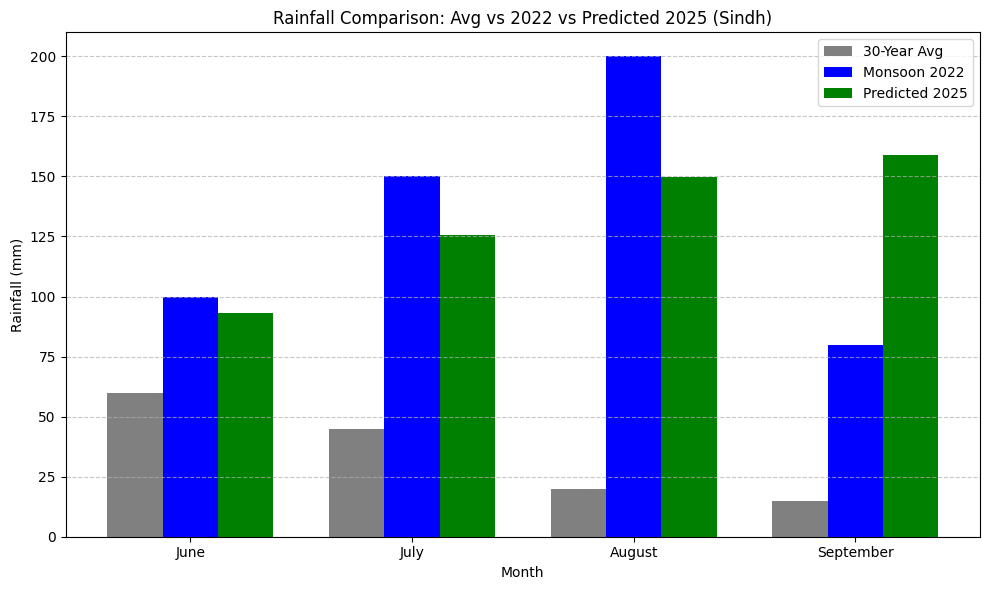

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define data (replace these with your real values)
months = ['June', 'July', 'August', 'September']

# Replace with actual values if available
avg_30yr = [60.0, 45.0, 20.0, 15.0]
monsoon_2022 = [100.0, 150.0, 200.0, 80.0]
monsoon_2025 = [rain_2025_june, rain_2025_july, rain_2025_august, rain_2025_september]

# Step 2: Set bar width and positions
x = np.arange(len(months))
width = 0.25

# Step 3: Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width, avg_30yr, width=width, label='30-Year Avg', color='gray')
plt.bar(x, monsoon_2022, width=width, label='Monsoon 2022', color='blue')
plt.bar(x + width, monsoon_2025, width=width, label='Predicted 2025', color='green')

# Step 4: Customize graph
plt.xticks(x, months)
plt.title('Rainfall Comparison: Avg vs 2022 vs Predicted 2025 (Sindh)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Step 5: Show the graph
plt.show()
